# Importing relevant libraries

In [66]:
#All necessary imports for the task to begin with - will be added to over time as we need more libraries/functions 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Loading the dataset using Pandas

In [67]:
#imports the dataset using pandas
diabetesData = pd.read_csv("diabetes.csv")

# Exploratory Data Analysis

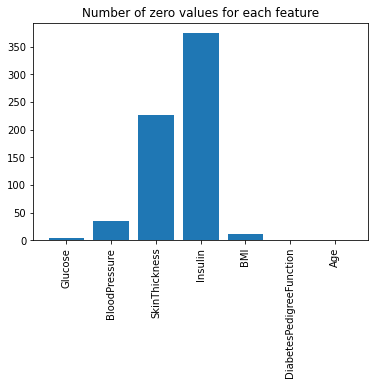

In [68]:
# Number of zero values for each feature
count = []
count_glucose = diabetesData['Glucose'][diabetesData['Glucose']== 0].count()
count_bp = diabetesData['BloodPressure'][diabetesData['BloodPressure']== 0].count()
count_skin = diabetesData['SkinThickness'][diabetesData['SkinThickness']== 0].count()
count_insulin = diabetesData['Insulin'][diabetesData['Insulin']== 0].count()
count_bmi = diabetesData['BMI'][diabetesData['BMI']== 0].count()
count_DPF = diabetesData['DiabetesPedigreeFunction'][diabetesData['DiabetesPedigreeFunction']== 0].count()
count_age = diabetesData['Age'][diabetesData['Age']== 0].count()
plt.bar([ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age'],[count_glucose,count_bp,count_skin, count_insulin, count_bmi, count_DPF, count_age], align='center')
plt.title("Number of zero values for each feature")
plt.xticks(rotation=90)
plt.show()


Diabetes Pedigree Function and Age hold no 0s, and Glucose, Blood Pressure and BMI hold very few. Following this, we opted to remove the 0s from these features entirely because removing these will have minimal effect on the data. Due to the large number of 0s for Skin Thickness and Insulin features, we used the calculated mean values for these features as aforementioned. 

In [69]:
#Finding median for Skin Thickness and Insulin by dropping the 0s first
diabetesData.drop(diabetesData.loc[diabetesData['SkinThickness'] == 0].index, inplace = True)
diabetesData.drop(diabetesData.loc[diabetesData['Insulin'] == 0].index, inplace = True)
SkinThicknessMedian = np.median(diabetesData['SkinThickness'])
InsulinMedian = np.median(diabetesData['Insulin'])

# Dropping Glucose and Blood Pressure and BMI. Replace 0s with medians for Skin Thickness and Insulin
diabetesData = pd.read_csv("diabetes.csv")
diabetesData.drop(diabetesData.loc[diabetesData['Glucose'] == 0].index, inplace = True)
diabetesData.drop(diabetesData.loc[diabetesData['BloodPressure'] == 0].index, inplace = True)
diabetesData['SkinThickness'].replace(0, SkinThicknessMedian, inplace=True)
diabetesData['Insulin'].replace(0, InsulinMedian, inplace=True)
diabetesData.drop(diabetesData.loc[diabetesData['BMI'] == 0].index, inplace = True)

### Distribution of the Data

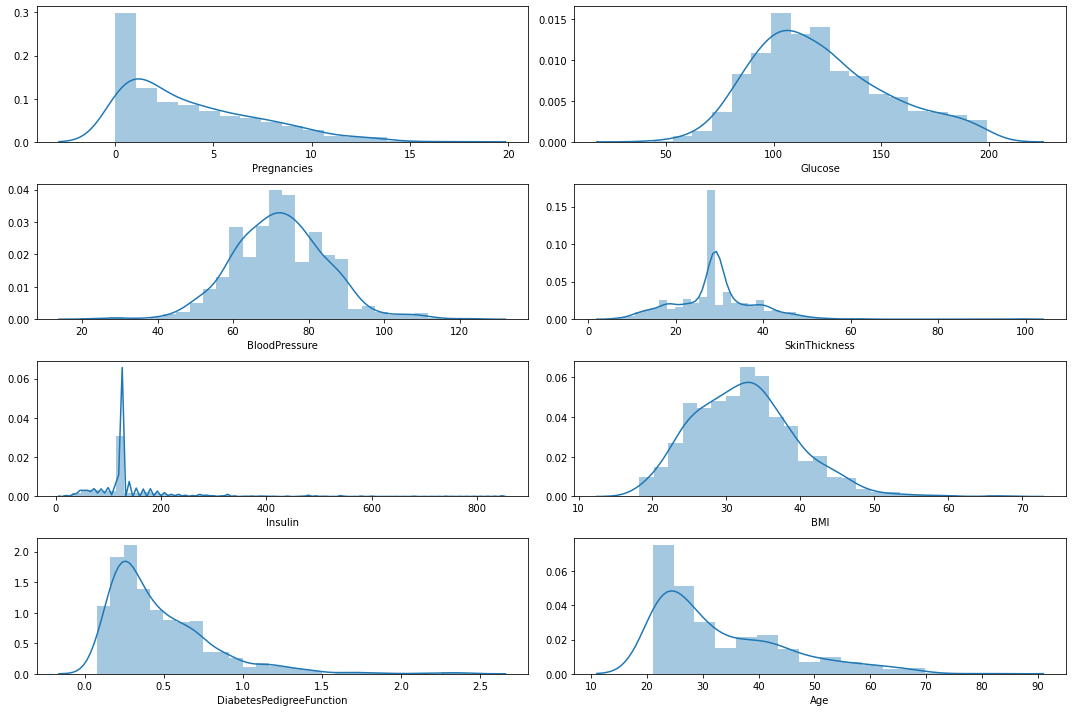

In [70]:
#all columns with features
X = diabetesData[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

#column with the class labels
y = diabetesData['Outcome']

#Histograms of distributions
n_rows=4
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10), sharex=False, sharey=False)
for i, column in enumerate(X):
    sns.distplot(diabetesData[column],ax=axes[i//n_cols,i%n_cols],axlabel= column)# kde = True, hist = False )
fig.tight_layout()
plt.show()

### Identifying Outliers

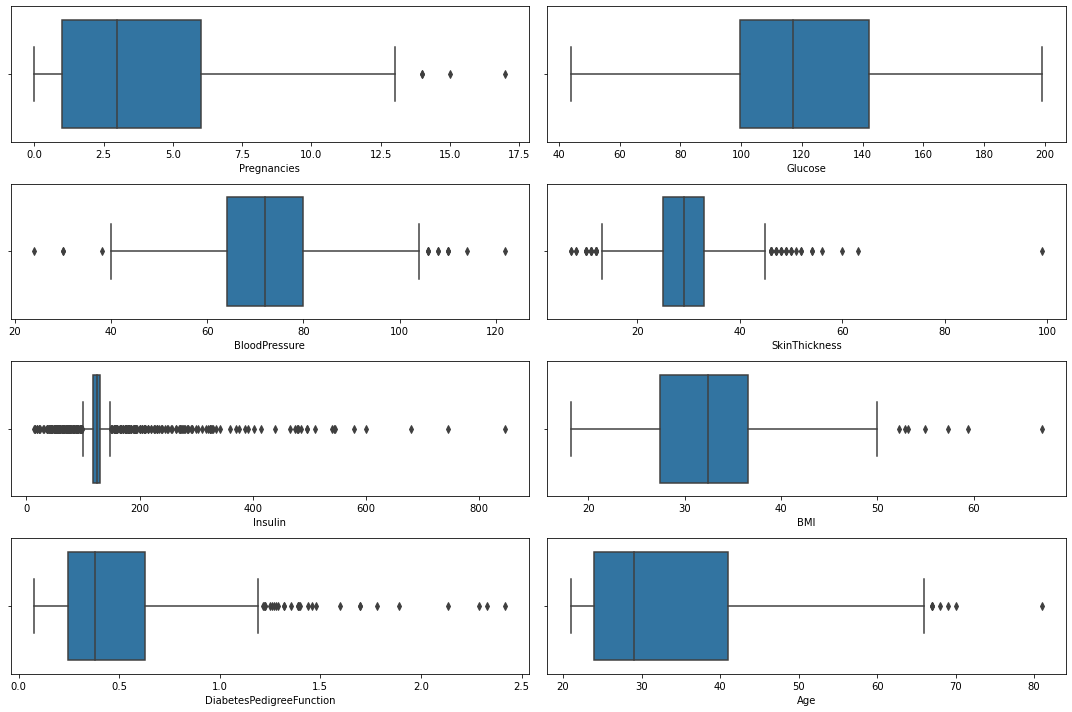

In [71]:
#boxplots to remove anomalies
n_rows=4
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10), sharex=False, sharey=False)
for i, column in enumerate(X):
    sns.boxplot(diabetesData[column],ax=axes[i//n_cols,i%n_cols])#axlabel= column)# kde = True, hist = False )
fig.tight_layout()
plt.show()

The boxplots for Insulin and Skin Thickness motivate our use of the median values to replace the 0s since there are many outliers and median is a good average to negate these outliers.

# Scaling/Normalising the Data

We have chosen the following classifiers: Random Forest, KNN, SVM. Since KNN and SVM are concerned distance when classifying the data, we need to scale the data for these classifiers. For random forest we do not need to scale the data.

In [72]:
#all columns with features
X = diabetesData[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

#column with the class labels
y = diabetesData['Outcome']

#SCALING OF THE DATASET
from sklearn.preprocessing import MinMaxScaler
#define standard scaler
scaler = MinMaxScaler()
#transform data
scaledX = scaler.fit_transform(X)

### Splitting the data

In [73]:
#randomly seeding the data
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2) 
#np.random.seed(9)
# Random forest classifer is the only classifier where we don't scale the data
X_train_RFC, X_test_RFC, y_train_RFC, y_test_RFC = train_test_split(X, y, test_size=0.2)

# Random Forest Classification

The three main parameters we were concerned with were: Number of estimators, Maximum depth of tree and Maximum features. We started off by varying the maximum depth and Maximum features parameter but choosing the default of 100 for number of estimators.

In [82]:
'''Using Random Forest'''
'''Watch Applied AI lecture on Random Forests'''

from sklearn.ensemble import RandomForestClassifier 
param_grid={'n_estimators': [100], 'max_depth':['None', 5, 10, 15, 25, 50], 'max_features': [2,3,4,5]}
rfc = RandomForestClassifier(random_state = 4)
model = GridSearchCV(estimator=rfc,
             param_grid=param_grid, cv =5, n_jobs = -1, scoring = 'f1')
model = model.fit(X_train_RFC,y_train_RFC)
final_model = model.best_estimator_
y_pred_RFC = final_model.predict(X_test_RFC)
print("Random Forest Classifier Evaluation:\n")
print("Best Params:",model.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test_RFC,y_pred_RFC))
print("The precision of the data is:", precision_score(y_test_RFC,y_pred_RFC))
print("The recall of the data is:", recall_score(y_test_RFC, y_pred_RFC))
print("The F1-score of the data is:",f1_score(y_test_RFC, y_pred_RFC), "\n")

Random Forest Classifier Evaluation:

Best Params: {'max_depth': 10, 'max_features': 4, 'n_estimators': 100}
Accuracy: 0.8
The precision of the data is: 0.7435897435897436
The recall of the data is: 0.6041666666666666
The F1-score of the data is: 0.6666666666666667 



This gives us reasonable metrics but what about when we vary the number of estimator parameter:

In [83]:
from sklearn.ensemble import RandomForestClassifier 
#np.random.seed(9)
param_grid={'n_estimators': [ 10, 20, 30, 40, 50, 100], 'max_depth':['None', 5, 10, 15, 25, 50], 'max_features': [2,3,4,5]}
rfc = RandomForestClassifier(random_state = 4)
model = GridSearchCV(estimator=rfc,
             param_grid=param_grid, cv =5, n_jobs = -1, scoring = 'f1')
model = model.fit(X_train_RFC,y_train_RFC)
final_model = model.best_estimator_
y_pred_RFC = final_model.predict(X_test_RFC)
print("Random Forest Classifier Evaluation:\n")
print("Best Params:",model.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test_RFC,y_pred_RFC))
print("The precision of the data is:", precision_score(y_test_RFC,y_pred_RFC))
print("The recall of the data is:", recall_score(y_test_RFC, y_pred_RFC))
print("The F1-score of the data is:",f1_score(y_test_RFC, y_pred_RFC), "\n")

Random Forest Classifier Evaluation:

Best Params: {'max_depth': 5, 'max_features': 4, 'n_estimators': 10}
Accuracy: 0.7931034482758621
The precision of the data is: 0.75
The recall of the data is: 0.5625
The F1-score of the data is: 0.6428571428571429 



The f1-score (our optimal metric) does not improve for this. What about when we use max_features as the default which is sqrt(n_features):

Random Forest Classifier Evaluation:

Best Params: {'max_depth': 10, 'n_estimators': 10}
Accuracy: 0.8
The precision of the data is: 0.7209302325581395
The recall of the data is: 0.6458333333333334
The F1-score of the data is: 0.6813186813186812 



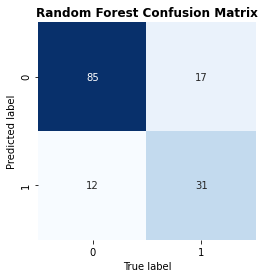

In [78]:
#RANDOM FOREST CLASSIFICATION

'''Using Random Forest'''
'''Watch Applied AI lecture on Random Forests'''

from sklearn.ensemble import RandomForestClassifier 
#np.random.seed(9)
param_grid={'n_estimators': [10, 20, 30, 40, 50, 100], 'max_depth':['None', 5, 10, 15, 25, 50]}#, 'max_features': [2,3,4,5]}
rfc = RandomForestClassifier(random_state = 4)
model = GridSearchCV(estimator=rfc,
             param_grid=param_grid, cv =5, n_jobs = -1, scoring = 'f1')
model = model.fit(X_train_RFC,y_train_RFC)
final_model = model.best_estimator_
y_pred_RFC = final_model.predict(X_test_RFC)
print("Random Forest Classifier Evaluation:\n")
print("Best Params:",model.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test_RFC,y_pred_RFC))
print("The precision of the data is:", precision_score(y_test_RFC,y_pred_RFC))
print("The recall of the data is:", recall_score(y_test_RFC, y_pred_RFC))
print("The F1-score of the data is:",f1_score(y_test_RFC, y_pred_RFC), "\n")

#Random Forest confusion matrix
mat = confusion_matrix(y_test_RFC, y_pred_RFC)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Random Forest Confusion Matrix", fontweight='bold')
plt.show()


When we use default max_features and vary number of estimators and max_depth, we get the optimal f1-score for testing. The best parameters for number of estimators is 10 and maximum depth is 10.

# KNN Classification

For KNN classification we want to vary the K nearest neighbours.

KNN Classifier Evaluation:

Best Params: {'n_neighbors': 11}
Accuracy: 0.8068965517241379
The precision of the data is: 0.6
The recall of the data is: 0.7297297297297297
The F1-score of the data is: 0.6585365853658536 



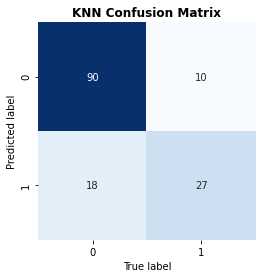

In [35]:
#KNN CLASSIFICATION

'''Using KNN'''
'''Watch Applied AI and Data Mining lectures on KNN'''


from sklearn.neighbors import KNeighborsClassifier
param_grid={'n_neighbors': [1,3,5,7,9,11,13,15]} # parameter we are varying
knn = KNeighborsClassifier()
model = GridSearchCV(estimator=knn,
             param_grid=param_grid, cv = 5, n_jobs = -1, scoring = 'f1')
model = model.fit(X_train,y_train)
final_model = model.best_estimator_
y_pred = final_model.predict(X_test)
print("KNN Classifier Evaluation:\n")
print("Best Params:",model.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("The precision of the data is:", precision_score(y_test,y_pred))
print("The recall of the data is:", recall_score(y_test, y_pred))
print("The F1-score of the data is:",f1_score(y_test, y_pred), "\n")

#KNN confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("KNN Confusion Matrix", fontweight='bold')
plt.show()


The parameters of K nearest neighbour of 11 gives us the best f1-score.

# Support Vector Machine Classification

The parameters for SVM that we want to vary were ones that impact the kernel which are the kernel type, kernel coefficient and degree of polynomial kernel function. We start off with the default kernel of rbf.

In [84]:
#SVM CLASSIFICATION

param_grid={'kernel': ['rbf'], 'gamma':['scale']}
svc = svm.SVC()
model = GridSearchCV(estimator=svc,
             param_grid=param_grid, cv =5, n_jobs = -1, scoring = 'f1')
model = model.fit(X_train,y_train)
final_model = model.best_estimator_
y_pred = final_model.predict(X_test)
print("SVM Classifier Evaluation:\n")
print("Best Params:",model.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("The precision of the data is:", precision_score(y_test,y_pred))
print("The recall of the data is:", recall_score(y_test, y_pred))
print("The F1-score of the data is:",f1_score(y_test, y_pred), "\n")


SVM Classifier Evaluation:

Best Params: {'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7931034482758621
The precision of the data is: 0.5813953488372093
The recall of the data is: 0.6756756756756757
The F1-score of the data is: 0.6250000000000001 



Now we want to look at different kernel types and degree:

SVM Classifier Evaluation:

Best Params: {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy: 0.8068965517241379
The precision of the data is: 0.6046511627906976
The recall of the data is: 0.7027027027027027
The F1-score of the data is: 0.6499999999999999 



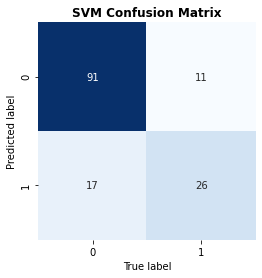

In [87]:
#SVM CLASSIFICATION

'''Using SVM'''
'''Watch Applied AI and Data Mining lectures on SVM'''

param_grid={'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'degree': [2,3,4,5], 'gamma':['scale']}
svc = svm.SVC()
model = GridSearchCV(estimator=svc,
             param_grid=param_grid, cv =5, n_jobs = -1, scoring = 'f1')
model = model.fit(X_train,y_train)
final_model = model.best_estimator_
y_pred = final_model.predict(X_test)
print("SVM Classifier Evaluation:\n")
print("Best Params:",model.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("The precision of the data is:", precision_score(y_test,y_pred))
print("The recall of the data is:", recall_score(y_test, y_pred))
print("The F1-score of the data is:",f1_score(y_test, y_pred), "\n")

#SVM confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("SVM Confusion Matrix", fontweight='bold')
plt.show()

This Parameter of {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'} gives us the best f1_score for training.